# Social Network Analysis in Python - Introduction to NetworkX

NetworkX is a Python library for working with graphs and perform analysis on them. It has built-in many fancy features like algorithms for creating specific graphs genres, or some centrality measures. But in this article we concentrate on work at grassroots - how to create graph, add and remove nodes and edges, add weighted edges, inspect graph properties an visualize graphs.

“By definition, a Graph is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc). In NetworkX, nodes can be any hashable object e.g., a text string, an image, an XML object, another Graph, a customized node object, etc.” — NetworkX documentation

Content below is based on very good NetworkX documentation where you can go deeper into NetworkX. In this post you may see simple examples how to use code.

#### Contents: 
1. Create a graph 
2. Add nodes, edges, weighted edges to a graph
3. Add attributes to graphs, nodes, edges 
4. Check a graph properties 
5. Access edges and neighbors 
6. Draw graphs 
7. Graphs I/O in GML format

## 1. Create a graph

### Create an empty graph

In [1]:
# Import the library
import networkx as nx

In [2]:
# Create an empty graph - collection of nodes
G = nx.Graph()

In [3]:
# Create a directed graph using connections from the previous graph G
H = nx.DiGraph(G)

In [4]:
# Clear the graph from all nodes and edges 
# it deletes also graph attributes, nodes attributes and edges attributes.
G.clear()

### Create a graph from a list of edges

In [5]:
# Create a list of edges (list of tuples)
edgelist = [(0, 1), (1, 2), (2, 3)]

In [6]:
# Create a graph
H = nx.Graph(edgelist)

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


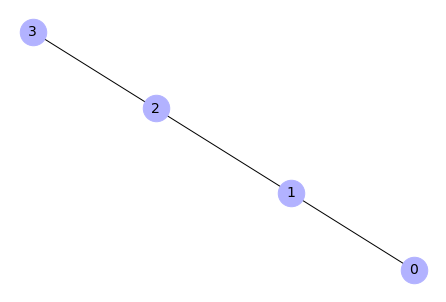

In [7]:
# Draw the graph
%matplotlib inline 
# particularly needed in Jupyter for inline plots

# Draw a plot
nx.draw(H, with_labels=True, node_color='#b2b2ff', node_size=700, font_size=14)

### Create a graph from an adjacency matrix

In [8]:
# Create an adjacency matrix
import numpy as np
adj_m = np.array([[0, 1, 1],
                  [1, 1, 1],
                  [0, 1, 0]])

In [9]:
# Create a graph
G = nx.from_numpy_matrix(adj_m)

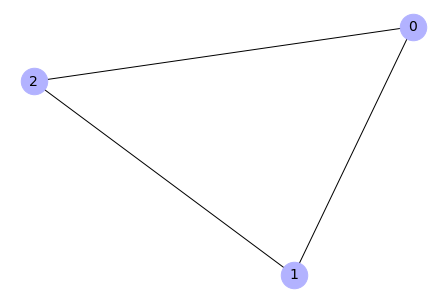

In [10]:
# Draw the graph
nx.draw(G, with_labels=True, node_color='#b2b2ff', node_size=700, font_size=14)

### Create a chain graph

In [11]:
# Create a chain graph (5 nodes from 0 to 4)
H = nx.path_graph(5)

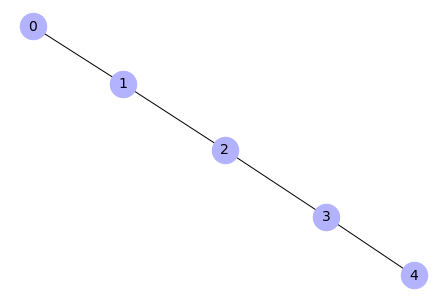

In [12]:
# Draw the graph
nx.draw(H, with_labels=True, node_color='#b2b2ff', node_size=700, font_size=14)

## 2. Add nodes, edges, weighted edges to a graph

### Add nodes to a graph

In [13]:
# Create an empty graph
G = nx.Graph()

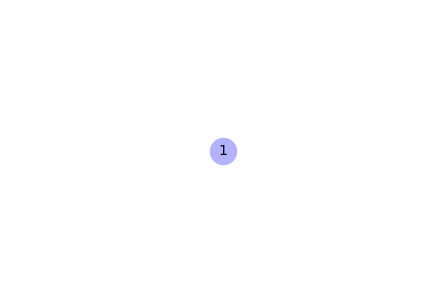

In [14]:
# Add a node 
G.add_node(1)

# Draw the graph
nx.draw(G, with_labels=True, node_color='#b2b2ff', node_size=700, font_size=14)

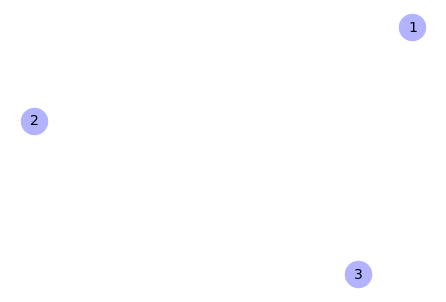

In [15]:
# Add a list of nodes
G.add_nodes_from([2, 3])

# Draw the graph
nx.draw(G, with_labels=True, node_color='#b2b2ff', node_size=700, font_size=14)

In [16]:
# Create a chain graph (5 nodes from 0 to 4)
H = nx.path_graph(5)
# Show created nodes
H.nodes

NodeView((0, 1, 2, 3, 4))

In [17]:
# Add nodes from the graph H to the graph G (nodes 1,2,3 are overwrited)
G.add_nodes_from(H)
G.nodes

NodeView((1, 2, 3, 0, 4))

We can see above that numbers play role of something like keys of particular nodes in graph. And this nodes may be overwritten. 

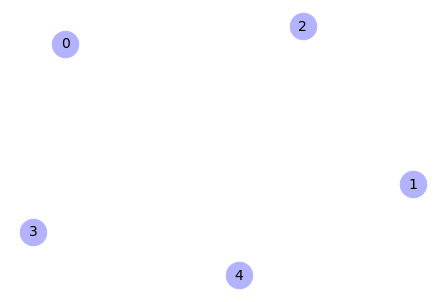

In [18]:
# Draw a graph
nx.draw(G, with_labels=True, node_color='#b2b2ff', node_size=700, font_size=14)

In [19]:
# Add node as a string label
G.add_node("la")        # adds node "la"
G.nodes

NodeView((1, 2, 3, 0, 4, 'la'))

In [20]:
# Add nodes as single string elements
G.add_nodes_from("la")  # adds 2 nodes: 'l', 'a'
G.nodes

NodeView((1, 2, 3, 0, 4, 'la', 'l', 'a'))

### Remove nodes from a graph

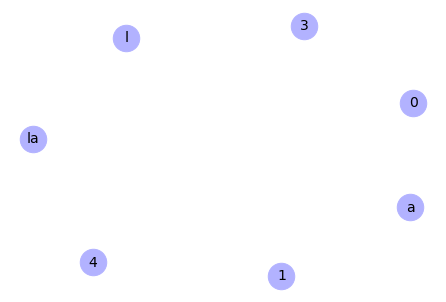

In [21]:
# Remove a node
G.remove_node(2)

# Draw the graph
nx.draw(G, with_labels=True, node_color='#b2b2ff', node_size=700, font_size=14)

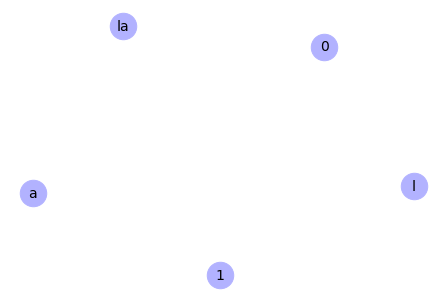

In [22]:
# Remove nodes from an iterable container
G.remove_nodes_from([3,4])

# Draw the graph
nx.draw(G, with_labels=True, node_color='#b2b2ff', node_size=700, font_size=14)

### Add edges to graph

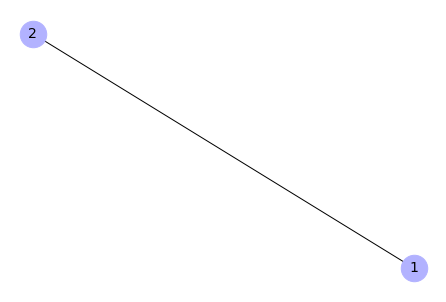

In [105]:
# Create an empty graph
G = nx.Graph()

# Add an edge between node 1 and 2
G.add_edge(1, 2)

# Draw the graph
nx.draw(G, with_labels=True, node_color='#b2b2ff', node_size=700, font_size=14)

We can see above that if edge is created - all needed non-existing nodes are created as well

In [106]:
# Create a tuple with 2, 3
e = (2, 3)
type(e)

tuple

In [107]:
# Use the tuple to create an edge between nodes 2 and 3
G.add_edge(*e)
G.edges

EdgeView([(1, 2), (2, 3)])

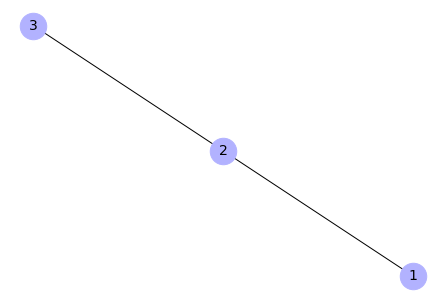

In [108]:
# Draw the graph
nx.draw(G, with_labels=True, node_color='#b2b2ff', node_size=700, font_size=14)

In [109]:
# Create a chain graph (5 nodes from 0 to 4)
H = nx.path_graph(5)
H.edges

EdgeView([(0, 1), (1, 2), (2, 3), (3, 4)])

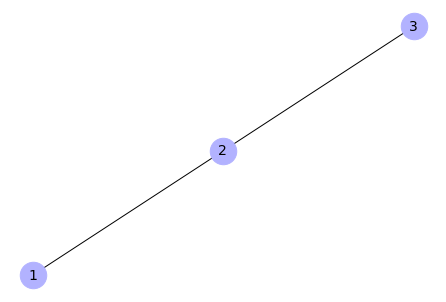

In [110]:
# Draw the graph
nx.draw(G, with_labels=True, node_color='#b2b2ff', node_size=700, font_size=14)

In [111]:
# Add an edge between node 3 and non-existing node m - which is automatically created
G.add_edge(3, 'm')

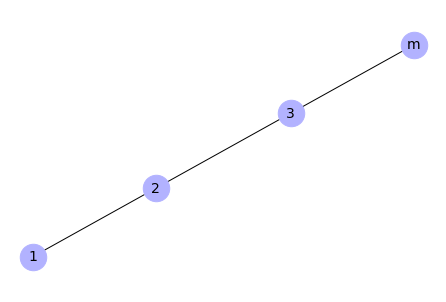

In [112]:
# Draw the graph
nx.draw(G, with_labels=True, node_color='#b2b2ff', node_size=700, font_size=14)

### Remove edges from graph

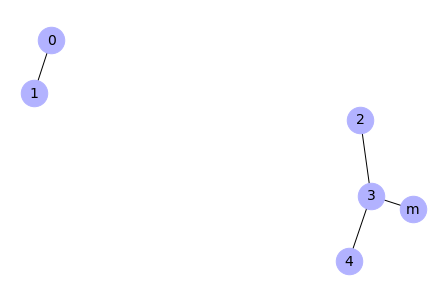

In [31]:
# Remove an edge
G.remove_edge(1, 2)

# Draw the graph
nx.draw(G, with_labels=True, node_color='#b2b2ff', node_size=700, font_size=14)

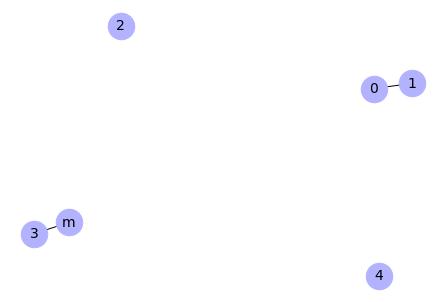

In [32]:
# Remove edges from an iterable container
G.remove_edges_from([(2, 3),(3, 4)])

# Draw the graph
nx.draw(G, with_labels=True, node_color='#b2b2ff', node_size=700, font_size=14)

### Add weighted edges to a graph

In [33]:
# Create an empty graph
G = nx.Graph()

# Add an edge with a weight as a tuple with a dictionary inside on a 3rd position  
G.add_edge(0, 1, weight=2.8)

In [34]:
G.edges

EdgeView([(0, 1)])

{(0,
  1): Text(1.1102230246251565e-16, -1.1102230246251565e-16, "{'weight': 2.8}")}

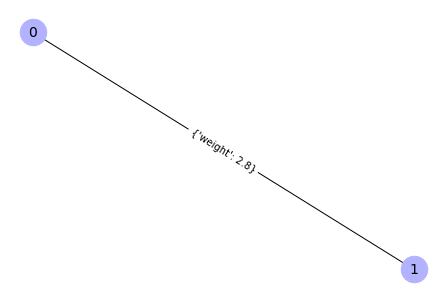

In [35]:
# Compute a position of graph elements (needed to visualize weighted graphs)
pos = nx.spring_layout(G)
# Draw the graph
nx.draw(G, pos = pos, with_labels=True, node_color='#b2b2ff', node_size=700, font_size=14)
# Add weights to a graph picture
nx.draw_networkx_edge_labels(G, pos)

### Create Erdős-Rényi graph

For an example we use Erdős-Rényi graph generation. It takes only one short line of code. This is a simple and powerful way of creating graphs. Method "erdos_renyi_graph()" takes 2 arguments. 1st is number of nodes, and second one is probability that a node will get an edge connection with every other particular node. So if more nodes, probability of node having any edge rise.

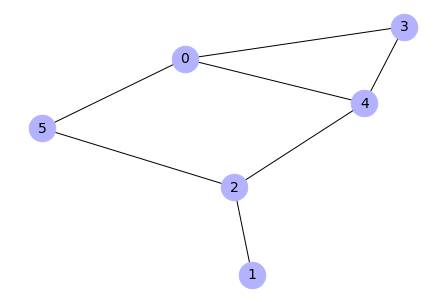

In [36]:
# Import libraries
import random
import numpy as np

# Generate Erdos-renyi graph 
G = nx.gnp_random_graph(6,0.4) # (gnp alias from: G-raph, N-odes, P-robability)
nx.draw(G, with_labels=True, node_color='#b2b2ff', node_size=700, font_size=14)

### Add random weights to graph

(0.45, 0.64, 0.34, 0.43, 0.5, 0.45, 0.05) ((0, 3), (0, 4), (0, 5), (1, 2), (2, 4), (2, 5), (3, 4))


{(0, 3): Text(0.5676488500282395, 0.6435529162027248, "{'weight': 0.45}"),
 (0, 4): Text(0.28349772142948715, 0.19289876496894792, "{'weight': 0.64}"),
 (0, 5): Text(-0.006940341493632957, 0.3277455501579697, "{'weight': 0.34}"),
 (1, 2): Text(-0.5142601968837542, -0.7110841276143697, "{'weight': 0.43}"),
 (2, 4): Text(-0.044792371103247866, -0.24474191450305816, "{'weight': 0.5}"),
 (2, 5): Text(-0.335230434026368, -0.10989512931403639, "{'weight': 0.45}"),
 (3, 4): Text(0.5212005383773871, 0.3833385774563999, "{'weight': 0.05}")}

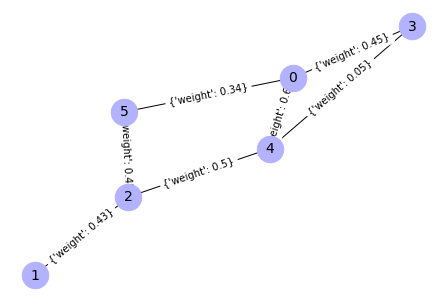

In [37]:
# Add random weights 
for u,v,d in G.edges(data=True):
    d['weight'] = round(random.random(),2) # there we may set distribution
    # in this loop we iterate over a tuples in a list
    #                    u - is actually 1st node of an edge
    #                    v - is second node of an edge
    #                    d - is dict with weight of edge

# Extract tuples of adges, and weights from the graph
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
print(weights, edges)

# Compute a position of graph elements (needed to visualize weighted graphs)
pos = nx.spring_layout(G)
# Draw the graph
nx.draw(G, pos = pos, with_labels=True, node_color='#b2b2ff', node_size=700, font_size=14)
# Add weights to a graph picture
nx.draw_networkx_edge_labels(G, pos)

Note that positions of nodes may differ from unweighted graph, but structure of graph is the same

## 3. Add attributes to graph, nodes and edges

### Add attributes to graph

In [38]:
# Create a graph
G = nx.Graph()
# Add 'day' attribute to graph with "Friday" value
G = nx.Graph(day = "Friday")
G.graph

{'day': 'Friday'}

In [39]:
# Change the attribute value
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

In [40]:
# Delete the graph attribute
del G.graph['day']

In [41]:
G.graph

{}

### Add attributes to nodes

In [42]:
# Create a graph
G = nx.Graph()

In [43]:
# Add attribute "time" with value, for node 1
G.add_node(1, time='5pm')

In [44]:
# Add attribute "time" with value, for node 3
G.add_nodes_from([3], time='2pm')

In [45]:
# Check attributes of 1 node
G.nodes[1]

{'time': '5pm'}

In [46]:
# Check attributes of 3 node
G.nodes[3]

{'time': '2pm'}

In [47]:
# Add attribute "room" with value, for node 1
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

In [48]:
# Delete a particular node attribute
del G.nodes[1]['room']

In [49]:
# Print nodes attributes
G.nodes.data()

NodeDataView({1: {'time': '5pm'}, 3: {'time': '2pm'}})

In [50]:
# Print nodes attributes
for k, v in G.nodes.items():
    print(f'{k:<4} {v}')

1    {'time': '5pm'}
3    {'time': '2pm'}


In [51]:
# Delete 'time' attributes from all nodes in loop
for k, v in G.nodes.items():
    del G.nodes[k]['time']

In [52]:
# Print node attributes
for k, v in G.nodes.items():
    print(f'{k:<4} {v}')

1    {}
3    {}


### Add attributes to edges

In [53]:
# Create a graph
G = nx.Graph()

{(1, 2): Text(0.0, -5.551115123125783e-17, "{'weight': 4.7}")}

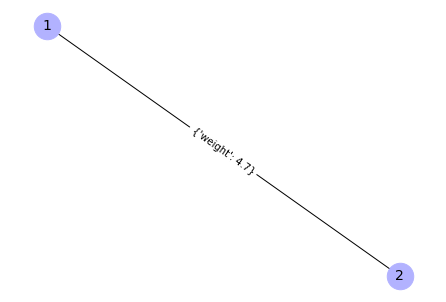

In [54]:
# Add weighted edge to the graph    
G.add_edge(1, 2, weight=4.7 )

# Compute a position of graph elements
pos = nx.spring_layout(G)
# Draw the graph
nx.draw(G, pos = pos, with_labels=True, node_color='#b2b2ff', node_size=700, font_size=14)
# Add weights to a graph picture
nx.draw_networkx_edge_labels(G, pos)

Weights are one type of attributes. We may create custom attributes.

{(1, 2): Text(0.04908000209973783, -0.6556693325685887, "{'weight': 4.7}"),
 (2, 3): Text(0.0057632233539603745, -0.07607363949113605, "{'color': 'red'}"),
 (3, 4): Text(-0.04908000209973783, 0.6556693325685885, "{'color': 'red'}")}

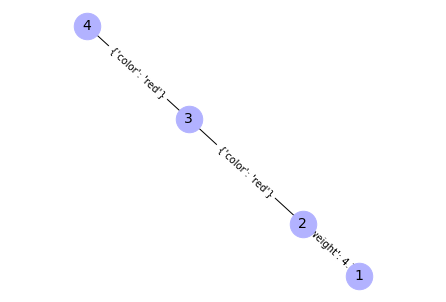

In [55]:
# Add 2 edges with attribute color to graph     
G.add_edges_from([(2, 3), (3, 4)], color='red')

# Compute a position of graph elements
pos = nx.spring_layout(G)
# Draw the graph
nx.draw(G, pos = pos, with_labels=True, node_color='#b2b2ff', node_size=700, font_size=14)
# Add attributes to a graph picture
nx.draw_networkx_edge_labels(G, pos)

In [56]:
# Another way to add an attribute
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])

In [57]:
# Another way to add an attribute
G.edges[1,2]['color'] = "white"
# Check added properties of edges
G.adj.items()

ItemsView(AdjacencyView({1: {2: {'weight': 4.7, 'color': 'white'}}, 2: {1: {'weight': 4.7, 'color': 'white'}, 3: {'color': 'red', 'weight': 8}}, 3: {2: {'color': 'red', 'weight': 8}, 4: {'color': 'red'}}, 4: {3: {'color': 'red'}}}))

In [58]:
# Print edges attributes in more readable way 
for k, v, w in G.edges.data():
    print(f'{k:<4} {v}{w}')

1    2{'weight': 4.7, 'color': 'white'}
2    3{'color': 'red', 'weight': 8}
3    4{'color': 'red'}


In the printings above we can see that node 1 has connection with node 2. And this edge has attributes weight and color. Node 2 has 2 connections - with node 1 and node 3.

In [59]:
# Add a weight for edge 1-2
G[1][2]['weight'] = 4.7

In [60]:
# or
G.edges[1, 2]['weight'] = 4.7    

In [61]:
# Check attributes on edges
G.edges.data()

EdgeDataView([(1, 2, {'weight': 4.7, 'color': 'white'}), (2, 3, {'color': 'red', 'weight': 8}), (3, 4, {'color': 'red'})])

In [62]:
# Print edges attributes in more readable way 
for k, v, w in G.edges.data():
    print(f'{k:<4} {v}{w}')

1    2{'weight': 4.7, 'color': 'white'}
2    3{'color': 'red', 'weight': 8}
3    4{'color': 'red'}


In [63]:
# Delete an edge attribute 
del G[2][3]['color']

In [64]:
# Print edges attributes 
for k, v, w in G.edges.data():
    print(f'{k:<4} {v}{w}')

1    2{'weight': 4.7, 'color': 'white'}
2    3{'weight': 8}
3    4{'color': 'red'}


In [65]:
G.edges.data()

EdgeDataView([(1, 2, {'weight': 4.7, 'color': 'white'}), (2, 3, {'weight': 8}), (3, 4, {'color': 'red'})])

In [66]:
# Delete edge attributes "weight"
for n1, n2, d in G.edges(data=True):
    if "weight" in d:
        del d["weight"]

In [67]:
# Print edges attributes 
for k, v, w in G.edges.data():
    print(f'{k:<4} {v}{w}')

1    2{'color': 'white'}
2    3{}
3    4{'color': 'red'}


## 4. Check graph properties

### Prepare graph

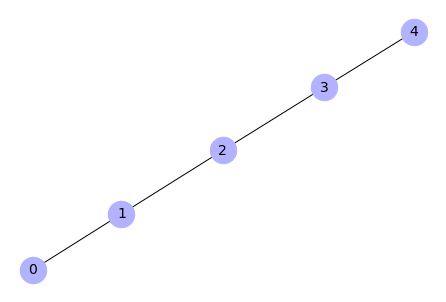

In [68]:
# Create a chain graph
G = nx.path_graph(5)
# Draw the graph
nx.draw(G, with_labels=True, node_color='#b2b2ff', node_size=700, font_size=14)

### Check properties

In [69]:
# Check number of nodes
G.number_of_nodes()

5

In [70]:
# Check number of edges
G.number_of_edges()

4

### Nodes View

In [71]:
# All nodes overview
G.nodes()

NodeView((0, 1, 2, 3, 4))

In [72]:
# or
list(G.nodes)

[0, 1, 2, 3, 4]

In [73]:
# or
G.nodes.items()

ItemsView(NodeView((0, 1, 2, 3, 4)))

In [74]:
# or
G.nodes.data()

NodeDataView({0: {}, 1: {}, 2: {}, 3: {}, 4: {}})

In [75]:
# or
G.nodes.data('span')

NodeDataView({0: None, 1: None, 2: None, 3: None, 4: None}, data='span')

### Edges View

In [76]:
# All edges overview
G.edges

EdgeView([(0, 1), (1, 2), (2, 3), (3, 4)])

In [77]:
# or
list(G.edges)

[(0, 1), (1, 2), (2, 3), (3, 4)]

In [78]:
# or
G.edges.items()

ItemsView(EdgeView([(0, 1), (1, 2), (2, 3), (3, 4)]))

In [79]:
# or (weights visible)
G.edges.data()

EdgeDataView([(0, 1, {}), (1, 2, {}), (2, 3, {}), (3, 4, {})])

In [80]:
# or (weights visible)
G.edges.data('span')

EdgeDataView([(0, 1, None), (1, 2, None), (2, 3, None), (3, 4, None)])

In [81]:
# or (for iterable container of nodes) - all edges associated with this 
#                                                       subset of nodes
G.edges([2, 'm'])

EdgeDataView([(2, 1), (2, 3)])

### Node degree View

In [82]:
# Check degree of particular nodes
G.degree

DegreeView({0: 1, 1: 2, 2: 2, 3: 2, 4: 1})

In [83]:
# List degrees in a column (":<4" makes 4 spaces between numbers)
for v, d in G.degree():
    print(f'{v:<4} {d}')

0    1
1    2
2    2
3    2
4    1


In [84]:
# or (for the one particular node)
G.degree[1]

2

In [85]:
# or (for the iterable container of nodes)
G.degree([2, 3])

DegreeView({2: 2, 3: 2})

### Adjacency view

In [86]:
# Check an adjacency matrix - neighbourhood between nodes
G.adj

AdjacencyView({0: {1: {}}, 1: {0: {}, 2: {}}, 2: {1: {}, 3: {}}, 3: {2: {}, 4: {}}, 4: {3: {}}})

In [87]:
# Print a dictionary in a dictionary in more readable way 
from pprint import pprint
pprint(dict(G.adj))

{0: AtlasView({1: {}}),
 1: AtlasView({0: {}, 2: {}}),
 2: AtlasView({1: {}, 3: {}}),
 3: AtlasView({2: {}, 4: {}}),
 4: AtlasView({3: {}})}


In [88]:
# Check neighbors of particular node
list(G.adj[3])


[2, 4]

In [89]:
# or
G[3]

AtlasView({2: {}, 4: {}})

In [90]:
# or
list(G.neighbors(3))

[2, 4]

## 5. Accessing edges and neighbors 

{(1, 2): Text(0.203796587596707, -0.35166502495302315, "{'weight': 0.125}"),
 (1, 3): Text(-0.6877371186842476, -0.43089869917805346, "{'weight': 0.75}"),
 (2, 4): Text(0.6877371186842474, 0.4308986991780536, "{'weight': 1.2}"),
 (3, 4): Text(-0.20379658759670716, 0.3516650249530233, "{'weight': 0.375}")}

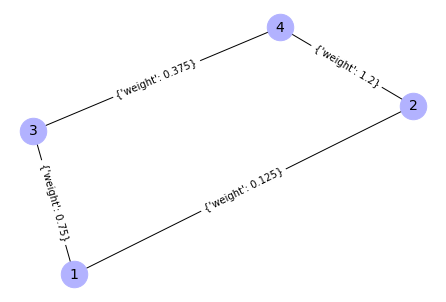

In [91]:
# Create a graph
G = nx.Graph()
G.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])

# Compute a position of graph elements
pos = nx.spring_layout(G)
# Draw the graph
nx.draw(G, pos = pos, with_labels=True, node_color='#b2b2ff', node_size=700, font_size=14)
# Add weights to a graph picture
nx.draw_networkx_edge_labels(G, pos)


### 1st method for edges + weights extraction

In [92]:
# Get 'weight' attributes
nx.get_edge_attributes(G,'weight').items()

dict_items([((1, 2), 0.125), ((1, 3), 0.75), ((2, 4), 1.2), ((3, 4), 0.375)])

In [93]:
# Build up variables
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

In [94]:
# Edges overview
edges # tuple of tuples

((1, 2), (1, 3), (2, 4), (3, 4))

In [95]:
# Weights overview
weights # tuple

(0.125, 0.75, 1.2, 0.375)

### 2nd method for edges + weights extraction

In [96]:
for (u, v, wt) in G.edges.data('weight'):
    print('(%d, %d, %.3f)' % (u, v, wt))

(1, 2, 0.125)
(1, 3, 0.750)
(2, 4, 1.200)
(3, 4, 0.375)


### 2nd method for edges + weights extraction with condition

In [97]:
for (u, v, wt) in G.edges.data('weight'):
    if wt < 0.5: print('(%d, %d, %.3f)' % (u, v, wt))

(1, 2, 0.125)
(3, 4, 0.375)


## 6. Draw graphs

### Figure size changing

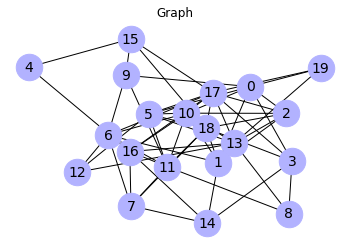

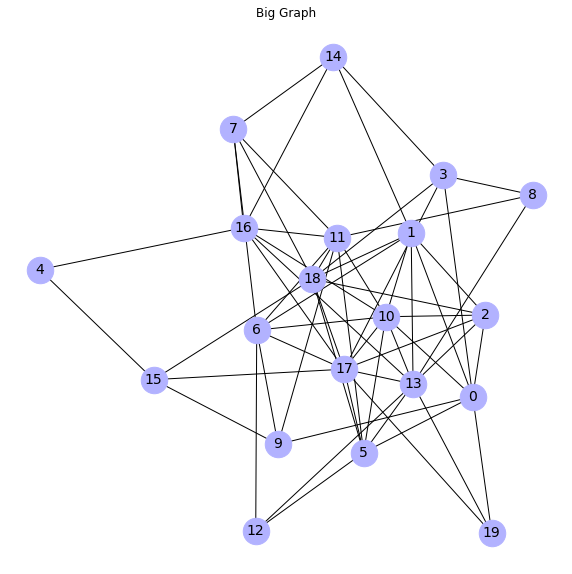

In [98]:
# Import libraries
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.erdos_renyi_graph(20, 0.30)

# Draw the graph
plt.figure(1) # default figure size 
plt.title("Graph") # Add title
nx.draw(G, with_labels=True, node_color='#b2b2ff', node_size=700, font_size=14)

# Draw big graph
plt.figure(2,figsize=(10,10)) # Custom figure size
plt.title("Big Graph") # Add title
nx.draw(G, with_labels=True, node_color='#b2b2ff', node_size=700, font_size=14)

### Draw 2 graphs on 1 chart

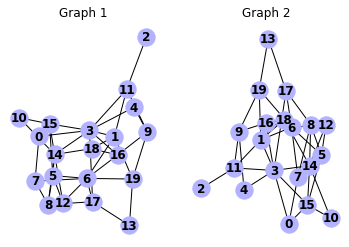

In [99]:
# Create a graph
G = nx.erdos_renyi_graph(20, 0.20)

# Draw graphs with "nx.draw" and subplots 
# Nr 121, 122 are for 2 graphs on 1 chartplt.subplot(121)

# Draw graph 1
plt.subplot(121)
plt.title("Graph 1")
nx.draw(G, with_labels=True, font_weight='bold', node_color='#b2b2ff')

# Draw graph 2
plt.subplot(122)
plt.title("Graph 2")
nx.draw(G, with_labels=True, font_weight='bold', node_color='#b2b2ff')

### Draw 4 graphs on 1 chart with kwargs

In the situation where we have to define arguments for many subplots we may use "kwargs" (keyworded arguments) feature. It allows us to define a dictionary contains keys with values, which become arguments of a function. Clear explanation of this feature you may find there https://pythontips.com/2013/08/04/args-and-kwargs-in-python-explained/.

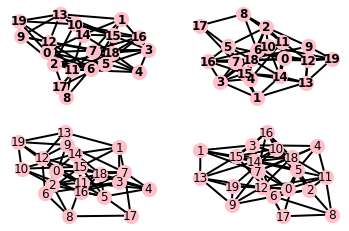

In [100]:
# Create a graph
G = nx.erdos_renyi_graph(20, 0.30)

# Define **kwargs - dictionary with arguments for a function
kwargs = {
    'node_color': 'pink',
    'node_size': 200,
    'width': 2, # 
    }

# Draw graphs with options in "kwargs" variable
# Nr 221, 222, 223, 224 are for 4 graphs on 1 chart
plt.subplot(221)
nx.draw(G, with_labels=True, font_weight='bold', **kwargs)
plt.subplot(222)
nx.draw(G, with_labels=True, font_weight='bold', **kwargs)
plt.subplot(223)
nx.draw(G, with_labels=True, **kwargs)
plt.subplot(224)
nx.draw(G, with_labels=True, **kwargs)


### Draw graph with more arguments specified

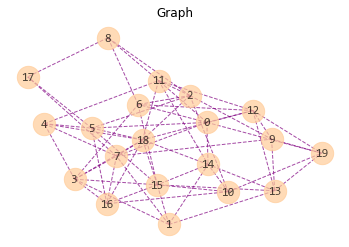

In [101]:
plt.title("Graph")
nx.draw(G, # graph object 
        with_labels=True, # label of node (numbers of nodes in this case)
        node_size=500, 
        node_color="#ffcc99", 
        node_shape="o", 
        alpha=0.7, # node transparency
        linewidths=1, # linewidth of symbol borders (nodes)
        width=1, # linewidth of edges
        edge_color="purple", 
        style="dashed", # style of edges
        font_size=12, 
        fontcolor="k", 
        font_family="Consolas")

 * with_labels (bool, optional (default=True)) – Set to True to draw labels 
    on the nodes. <br>
 * node_size (scalar or array, optional (default=300)) – Size of nodes. 
    If an array is specified it must be the same length as nodelist <br>
 * node_color (color string, or array of floats, (default=’#1f78b4’)) 
    – Node color. Can be a single color format string, or a sequence of colors 
   with the same length as nodelist. If numeric values are specified they will 
    be mapped to colors using the cmap and vmin,vmax parameters. See 
    matplotlib.scatter for more details. <br>
 * node_shape (string, optional (default=’o’)) – The shape of the node. 
    Specification is as matplotlib.scatter marker, one of ‘so^>v<dph8’. <br>
 * alpha (float, optional (default=1.0)) – The node and edge transparency <br>
 * linewidths ([None | scalar | sequence]) – Line width of symbol border 
    (default =1.0) <br>
 * width (float, optional (default=1.0)) – Line width of edges <br>
 * edge_color (color string, or array of floats (default=’r’)) – Edge color. 
     Can be a single color format string, or a sequence of colors with 
     the same length as edgelist. If numeric values are specified they will be 
     mapped to colors using the edge_cmap and edge_vmin,edge_vmax parameters. <br>
 * style (string, optional (default=’solid’)) – Edge line style 
     (solid|dashed|dotted,dashdot) <br>
 * font_size (int, optional (default=12)) – Font size for text labels <br>
 * font_color (string, optional (default=’k’ black)) – Font color string <br>
 * font_family (string, optional (default=’sans-serif’)) – Font family <br>
 
 Check more arguments:
 https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx


### Add random weights to graph and draw as colored edges

Very interesting way for visualize weighted graph is to color its edges depending on weights. 

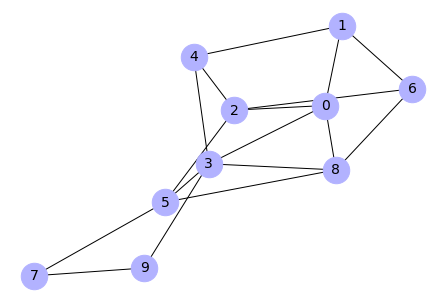

In [102]:
# Generate Erdős-Rényi graph
G = nx.gnp_random_graph(10,0.3)
nx.draw(G, with_labels=True, node_color='#b2b2ff', node_size=700, font_size=14)

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


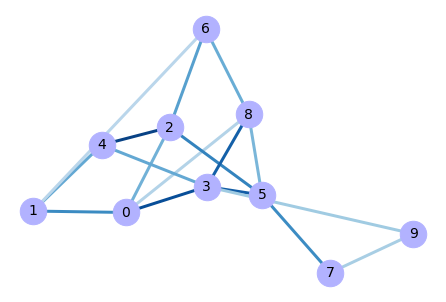

In [103]:
# Add random weights 
for u,v,d in G.edges(data=True):
    d['weight'] = random.random() # there we may set distribution
    # in this loop we iterate over a tuples in a list
    #                    u - is actually 1st node of an edge
    #                    v - is second node of an edge
    #                    d - is dict with weight of edge
    
# Extract tuples of adges, and weights from graph
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

# Compute optimized nodes positions
pos = nx.spring_layout(G)
# Draw the graph
nx.draw(G, pos, edgelist=edges, 
        edge_color=weights, width=3.0, edge_cmap=plt.cm.Blues, 
        edge_vmin=-0.4, edge_vmax=1, with_labels=True,
        node_color='#b2b2ff', node_size=700, font_size=14)

Note that positions of nodes may differ from unweighted graph, but structure of graph is the same.


In [104]:
G.edges(data=True)

EdgeDataView([(0, 1, {'weight': 0.5128343731288872}), (0, 2, {'weight': 0.2811454453132136}), (0, 3, {'weight': 0.8391275720120223}), (0, 8, {'weight': 0.0345395884135099}), (1, 4, {'weight': 0.3376764109599548}), (1, 6, {'weight': 0.0024956735679265707}), (2, 4, {'weight': 0.9047429105265123}), (2, 5, {'weight': 0.5550898011933102}), (2, 6, {'weight': 0.38559969686812856}), (3, 4, {'weight': 0.33366285675920493}), (3, 5, {'weight': 0.75621138060133}), (3, 8, {'weight': 0.7420124819269909}), (3, 9, {'weight': 0.11774054652851651}), (5, 7, {'weight': 0.5027598285938356}), (5, 8, {'weight': 0.2490386817405449}), (6, 8, {'weight': 0.3075151826934862}), (7, 9, {'weight': 0.08633111355199963})])